# **Experiment Notebook**



In [753]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [754]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [755]:
# <Student to fill this section>
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway

---
## A. Project Description


In [756]:
# <Student to fill this section>
student_name = "Agam Singh Saini"
student_id = "25531702"
group_id = "20"

In [757]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [758]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [759]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [760]:
# <Student to fill this section>
business_use_case_description = """
The goal of this Project is to predict if a college basketball player will be drafted to join the NBA league based on his statistics for the current season. 
The predictions should be this  percent accurate with this confidence.
""" replace this with numbers 

SyntaxError: invalid syntax (2339860008.py, line 5)

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

NameError: name 'business_use_case_description' is not defined

In [761]:
# <Student to fill this section>
business_objectives = """

- Accurate predictions will help teams in making informed decisions to select good players.
- This will help in saving time and resources by focussing attention to possible high potential players.
- Teams using data-driven insights will be at huge adavantage than others.
"""

In [762]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [763]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
The results will be used to 
- draw analysis by commentators
- create strategies by college players to increase their chances of selection
- fans to guess the future stars
- data scientist to study the model prediction for research and other purposes

The users of model predictions would be 
    - Sports commentators -> To prepare the analysis and draft of storytelling and commentory.
    - Fans -> Follow predictions to guess the future stars, support them and  share opinions about them.
    - Teams -> Use predictions to find which players they need to focus their attention and resources on 
    - Data Scientists -> Can use model for benchmark or case study for predictive modeling in sports.
    - College Players -> To identify their chances to make it to the team.

The people impactetd by predictions are 
- college players
- sports commentators
- fans
- teams
- Data Scientists
     """

In [764]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [765]:
# <Student to fill this section>
test=pd.read_csv("../data/raw/test.csv")
train=pd.read_csv("../data/raw/train.csv")
train.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0


### C.1.5 Explore Dataset

In [766]:
# Check how many columns has more than 1 unique value
train.nunique().sort_values(ascending=True)

yr             1
type           1
drafted        2
year          10
ht            32
           ...  
obpm       12256
porpag     12257
gbpm       12260
dgbpm      12262
ogbpm      12265
Length: 62, dtype: int64

- It appears that the 'yr' and 'type' columns contain only a single unique value each, so they will not provide useful information for the model hence we will remove it during cleaning stage

In [767]:
numerical_features= train.select_dtypes(include=['int', 'float'])
categorical_features= train.select_dtypes(include=['object'])
numerical_features.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,17.6,24.7,...,2.85299,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,0.0
1,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,0.0,19.6,...,-7.10210,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0
2,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,0.0,40.3,...,-7.07681,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,0.0
3,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,25.2,27.4,...,-1.59327,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,0.0
4,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,10.2,47.1,...,-10.30560,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,0.0


-  There are 56 numerical columns

In [768]:
train.describe(include=['int', 'float'])

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,14774.000000,14774.000000,14774.000000,14774.000000,14774.000000,14774.000000,14774.000000,14774.000000,14774.000000,14774.000000,...,14769.000000,14769.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14774.000000
mean,21.251726,25.870123,85.771707,17.256674,41.507628,44.566821,5.644010,11.992744,9.776100,21.493326,...,-3.376953,-0.757406,0.552453,1.269347,1.821801,0.717322,0.368722,0.206213,3.662676,0.007987
std,10.517642,23.639878,34.164203,6.332899,20.610900,19.622173,15.097867,15.348129,9.906416,13.979387,...,6.613226,3.773361,0.585068,1.125643,1.625416,0.897261,0.375689,0.343153,3.623175,0.089015
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-106.262000,-71.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,4.200000,75.600000,13.900000,34.800000,38.820000,1.600000,7.500000,3.200000,14.900000,...,-5.738050,-2.138620,0.138900,0.428600,0.625000,0.125000,0.083300,0.000000,1.000000,0.000000
50%,25.000000,19.600000,91.300000,17.200000,44.900000,48.285000,4.200000,11.000000,7.900000,20.500000,...,-2.890420,-0.598833,0.381000,1.000000,1.400000,0.400000,0.259300,0.083300,2.448300,0.000000
75%,30.000000,42.900000,102.600000,20.600000,51.400000,54.090000,8.000000,15.100000,13.700000,26.900000,...,-0.311598,0.878493,0.764700,1.827600,2.551700,0.971400,0.545500,0.250000,5.363600,0.000000
max,41.000000,94.300000,407.300000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000,...,95.585200,66.877300,4.888900,8.636400,11.757600,8.656200,4.000000,5.258100,27.375000,1.000000


In [769]:
train.describe(include=['object'])

,team,conf,yr,ht,type,player_id
count,14774,14774,14774,14766,14774,14774
unique,355,36,1,32,1,12155
top,Air Force,ACC,Fr,8-Jun,all,a1a06d07-12ae-4dfd-b295-011484a648d4
freq,72,652,14774,1440,14774,4


In [770]:
categorical_features.head()

,team,conf,yr,ht,type,player_id
0,Pacific,BW,Fr,11-May,all,681edf6e-41cb-4fd1-ba91-da573e063fbc
1,Mississippi,SEC,Fr,2-Jun,all,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4
2,Stephen F. Austin,Slnd,Fr,1-Jun,all,ca0d8700-807d-4fce-a7a9-63922d1981e6
3,Virginia,ACC,Fr,1-Jun,all,01285c6b-bc71-4fa8-941a-28cf3976a117
4,Elon,SC,Fr,2-Jun,all,a962c41c-55ff-461e-8585-db32e4fa0580


- There are 6 categorical columns
- 'ht' column should be numerical as per the description in the meta.csv file
- these numbers represent is height in feet and inches (since Americans use imperial units for height) but somehow the csv has stored them as dates
- we will deal with this in the feature engineering

### lets find null values next

In [771]:
train.isnull().sum().sort_values(ascending=False)

Rec_Rank           9885
dunks_ratio        9388
rim_ratio          3203
mid_ratio          3191
midmade_midmiss    2075
                   ... 
GP                    0
team                  0
type                  0
player_id             0
drafted               0
Length: 62, dtype: int64

In [772]:
# Count missing values per column
missing_counts = train.isnull().sum()
# Filter columns with at least one missing value
missing_counts = missing_counts[missing_counts > 0]
# Sort in descending order
missing_counts = missing_counts.sort_values(ascending=False)
# Display the result
print("The number of missing values greater than 10 is:")
print((missing_counts.values>10).sum())
print('All columns with missing values:')
print(missing_counts)


The number of missing values greater than 10 is:
11
All columns with missing values:
Rec_Rank               9885
dunks_ratio            9388
rim_ratio              3203
mid_ratio              3191
midmade                2075
rimmade                2075
dunksmade              2075
dunksmiss_dunksmade    2075
rimmade_rimmiss        2075
midmade_midmiss        2075
ast_tov                1535
ht                        8
drtg                      5
adrtg                     5
dporpag                   5
stops                     5
bpm                       5
obpm                      5
dbpm                      5
gbpm                      5
ogbpm                     5
dgbpm                     5
mp                        1
oreb                      1
dreb                      1
treb                      1
ast                       1
stl                       1
blk                       1
pts                       1
dtype: int64


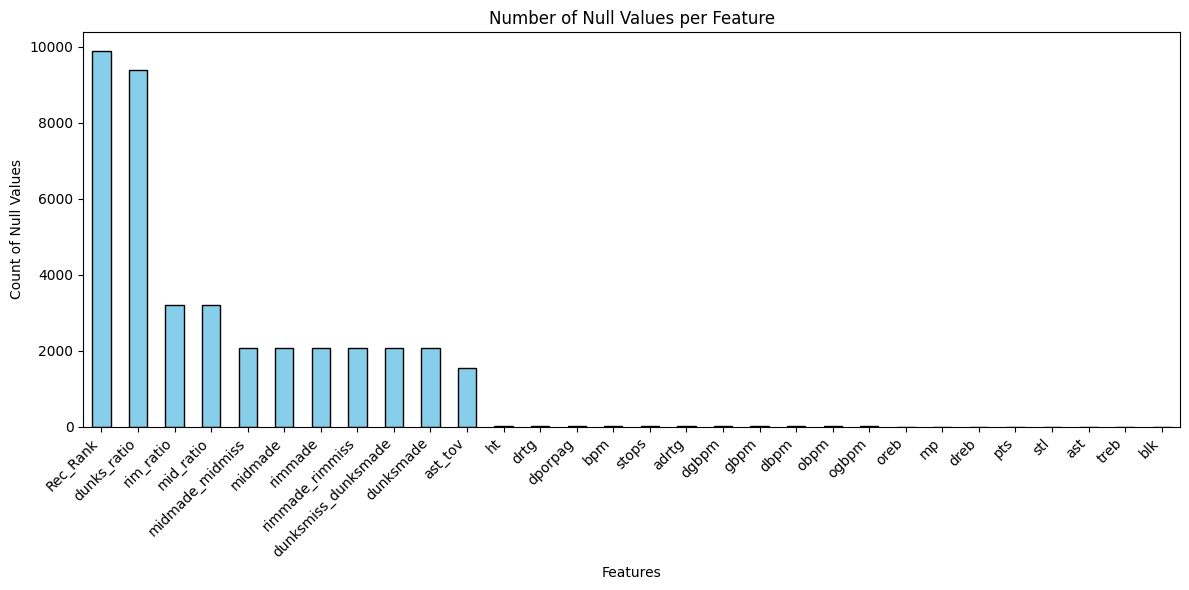

In [773]:
null_counts = train.isnull().sum().sort_values(ascending=False)
# Filter only features with missing values
null_counts = null_counts[null_counts > 0]
# Plot
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Null Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- 11 columns have large amount of null values which will be dealt in the cleaning dataset stage.
- and 19 columns has few number of null values which can be removed 

In [774]:
# Check for duplicate rows
duplicate_rows = train[train.duplicated()]

# Display the number of duplicates
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicates
duplicate_rows.head()



Number of duplicate rows: 2462


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
12312,Liberty,BSth,14,1.5,54.6,34.8,18.8,27.93,14.2,26.8,...,-1.070620,0.1111,0.2778,0.3889,0.0556,0.1667,0.0000,0.2778,bace233f-cb91-4518-876f-66099be5ad37,0.0
12313,Cincinnati,BE,31,53.7,103.7,19.5,45.0,48.54,6.6,9.9,...,-0.384077,1.2903,1.8710,3.1613,1.3871,0.4516,0.1613,7.2903,e9370cf9-f64f-4666-b905-b041e2ca111c,0.0
12314,Ball St.,MAC,23,26.3,72.5,16.8,25.0,34.57,4.6,8.7,...,-0.579843,0.5652,1.0435,1.6087,1.0000,0.2609,0.1304,2.2609,07b7b849-1636-40ba-8418-9998c66a9d4c,0.0
12315,Prairie View A&M,SWAC,25,28.7,85.1,15.6,39.3,45.57,2.4,9.0,...,-0.044470,0.2800,1.0000,1.2800,1.2000,0.5200,0.0000,2.4400,bab9e93e-51bd-4fac-b45b-ed96b0dfee43,0.0
12316,Baylor,B12,14,2.2,93.2,31.6,45.0,54.35,16.2,9.9,...,-1.024930,0.2857,0.2143,0.5000,0.0714,0.0000,0.1429,1.0714,ed351de6-505e-4eef-a087-12948eefd100,0.0


- there are 2462 duplicate values which will be removed in the cleaning stage

In [775]:
# <Student to fill this section>
Explore_dataset_explanations = """

### Dataset Analysis

- Numerical Features:  
  The dataset contains 56 numerical columns, representing various player statistics and performance metrics. 
  These features are likely to be important for modeling and will require further analysis for missing values, outliers, and distribution.

- Categorical Features:  
  There are 6 categorical columns. One notable issue is the `'ht'` (height) column, which should be numerical but is currently stored as a date format.
    This will need to be converted to a proper numerical representation during feature engineering.

    
- Irrelevant Columns:  
  It appears that the `'yr'` and `'type'` columns contain only a single unique value each, 
  so they will not provide useful information for the model and can be removed during data cleaning.

- Data Quality Issues:  
  - Null Values:  
    - 11 columns have a large number of missing values. These columns will need to be addressed in the data cleaning stage, either by imputation or removal if the missingness is too high.
    - 19 columns have a small number of missing values, which can be removed or imputed with minimal impact on the dataset.
  - Duplicates:  
    - There are 2,462 duplicate rows in the dataset. These duplicates will be removed during data cleaning to ensure data integrity and prevent bias in model training.

- Feature Engineering Needs:  
  - The `'ht'` column requires conversion from its current format to a usable numerical value (e.g., total inches or centimeters).
  - Additional feature engineering may be needed to handle skewed distributions, outliers, and to create new features that better capture player performance.

- Overall:  
  The dataset is rich in both numerical and categorical features but requires significant cleaning and preprocessing. 
  Addressing missing values, duplicates, and incorrect data types is essential before proceeding to modeling. 
  Proper feature engineering will further enhance the predictive power of the dataset.

"""

In [776]:
# Do not modify this code
print_tile(size="h3", key='Explore_dataset_explanations', value=Explore_dataset_explanations)

### C.2 Define Target variable

In [777]:
# <Student to fill this section>
target= train["drafted"]

In [778]:
target.unique()

array([0., 1.])

- It has just 2 unique values.

In [779]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.
The target variable is Drafted which gives a value of 0 or 1, indicating the selection of the player. 
The value equal to 1 representing strong chance of the player to get in the team. 
- Players use this to know their standing against others and how much they need to improve.
- commentators use this to fuel richer narratives backed by data quatifying their speech.
- fans able to match chances and rank players and decide on the comptence of the match.

"""

In [780]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [781]:
# <Student to fill this section>

target_name = 'drafted'

### C.4 Explore Target variable

In [782]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: drafted, dtype: float64

In [783]:
# <Student to fill this section>
target.describe()

count    14774.000000
mean         0.007987
std          0.089015
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: drafted, dtype: float64

-  we can see target column has 14774 rows.
- It has maximum value 1 
- It has minimum value 0
- it has mean close to 0.008 which suggest that there are alot more values equal to 0 than 1.

In [784]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14774 entries, 0 to 14773
Series name: drafted
Non-Null Count  Dtype  
--------------  -----  
14774 non-null  float64
dtypes: float64(1)
memory usage: 115.6 KB


- There are no Null values as non null count meet the rangeindex entries count


In [785]:
target.value_counts()

drafted
0.0    14656
1.0      118
Name: count, dtype: int64

In [786]:

# Count drafted vs not drafted
counts = train['drafted'].value_counts()
labels = ['Not Selected', 'Selected']
colors = ['red', 'green']

# Create interactive donut chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=counts,
    hole=0.5,
    marker=dict(colors=colors),
    hoverinfo='label+percent+value',
    textinfo='label+percent'
)])

fig.update_layout(
    title_text='Interactive Donut Chart: Drafted vs Not Drafted Players',
    showlegend=True
)

fig.show()


- We can see the data is highly biased towards not getting selected 
- We have only 0.799 % of getting selected data points 
- We have 99.2% of gettting Not Selected data points

In [787]:
# <Student to fill this section>
target_distribution_explanations = """
**Target Variable Analysis:**

- Definition:  
  The target variable is `drafted`, a binary indicator (1 = player drafted to NBA, 0 = not drafted).

- Distribution:  
  - Out of 14,774 samples, only 118 are positive (drafted), and 14,656 are negative (not drafted).
  - This means only ~0.8% of players are drafted, while ~99.2% are not.
  - The distribution is extremely imbalanced, as visualized in the donut chart above.

- No Missing Values:  
  - The target variable is complete, with no missing or null entries.

- Limitations & Issues:
  1. Severe Class Imbalance:  
     - The positive class (drafted) is extremely rare.  
     - Standard classifiers may be biased toward predicting the majority class (not drafted), leading to poor recall for the minority class.
     - Accuracy is a misleading metric in this context; a model predicting all 0s would still be >99% accurate.
     - Imbalanced data can cause underfitting for the minority class and may require special handling (e.g., resampling, class weighting, anomaly detection approaches).

  2. Potential for Overfitting:  
     - With so few positive samples, models may overfit to noise in the minority class.
     - Cross-validation splits must be stratified to ensure representation of both classes.

  


"""

In [788]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `Pts`

In [789]:
# <Student to fill this section>
feature_of_interest1 = train['pts']
print(feature_of_interest1.head(5))
feature_of_interest1.describe()

0    9.6538
1    2.0000
2    0.5000
3    7.7500
4    0.5714
Name: pts, dtype: float64


count    14773.000000
mean         3.662676
std          3.623175
min          0.000000
25%          1.000000
50%          2.448300
75%          5.363600
max         27.375000
Name: pts, dtype: float64

- The maximum value is 27.375 
- The minimum value is 0
- The mean is 3.662 suggesting most values are close to score of 3.6
- 75 % of observations donot cross score of 5.37 

In [790]:
feature_of_interest1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14774 entries, 0 to 14773
Series name: pts
Non-Null Count  Dtype  
--------------  -----  
14773 non-null  float64
dtypes: float64(1)
memory usage: 115.6 KB


- It has one Null Value
- we can also see that the data type is of float and is right for the column 

In [791]:
train[feature_of_interest1.isnull()]

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
11327,Montana,BSky,28,20.7,95.9,21.7,60.0,55.66,12.0,15.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499d4d12-c8c3-47d2-865f-42ca13393cc7,0.0


In [792]:
feature_of_interest1.value_counts()

pts
0.0000     1182
1.0000      305
0.5000      209
2.0000      160
0.6667      144
           ... 
8.0400        1
13.4545       1
23.6970       1
0.7826        1
15.5882       1
Name: count, Length: 3453, dtype: int64

- The feature has 3453 unique values
- count corresponding to 0 is significant higher

In [793]:
# Different values for drafted with feaure_of_interest1 value == 0
train[feature_of_interest1==0].drafted.value_counts()

drafted
0.0    1182
Name: count, dtype: int64

- as suspected all the players with zero pts score are not drafted

In [794]:
# Different values for drafted with feaure_of_interest1 value >5
train[feature_of_interest1>5].drafted.value_counts()

drafted
0.0    3865
1.0     115
Name: count, dtype: int64

- 115 out of 118 drafted players have pts score greater than 5 ( almost top 25% players).
- this suggest this column is highly important for determining drafting.

Text(0.5, 1.0, 'Scatter Plot: Points vs Drafted')

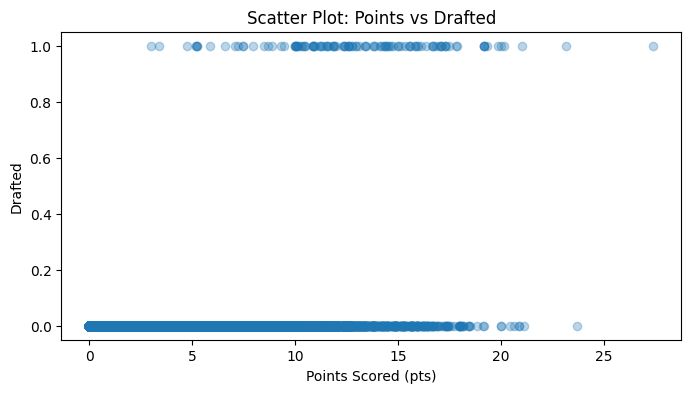

In [795]:

plt.figure(figsize=(8, 4))
plt.scatter(train['pts'], train['drafted'], alpha=0.3)
plt.xlabel('Points Scored (pts)')
plt.ylabel('Drafted')
plt.title('Scatter Plot: Points vs Drafted')

- this graph clearly shows that pts value greater than 5 corresponds to high chances of getting drafted

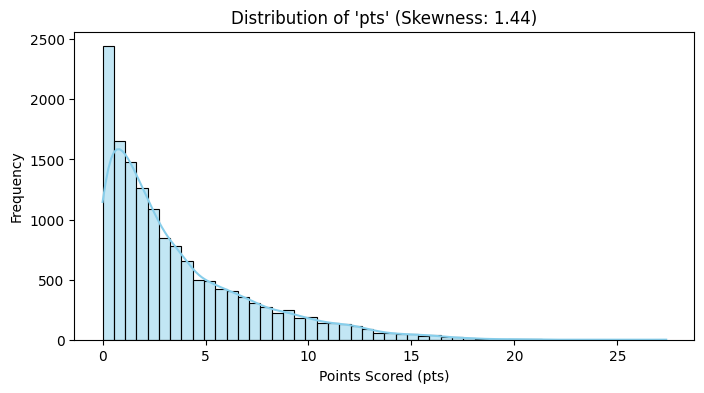

In [796]:
plt.figure(figsize=(8, 4))
sns.histplot(train['pts'], bins=50, kde=True, color='skyblue')
plt.title(f"Distribution of 'pts' (Skewness: {train['pts'].skew():.2f})")
plt.xlabel('Points Scored (pts)')
plt.ylabel('Frequency')
plt.show()

- the column is right skewed making it difficult for models to train and become easily biased.

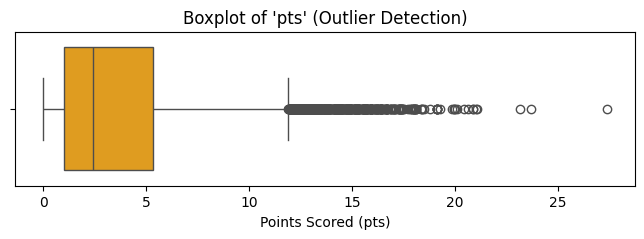

In [797]:
# Visualize outliers in the 'pts' column using a boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=train['pts'], color='orange')
plt.title("Boxplot of 'pts' (Outlier Detection)")
plt.xlabel('Points Scored (pts)')   
plt.show()

- there are so outliers but since we have highly favoured category, these outliers may be biased towards just majority class
- let us see

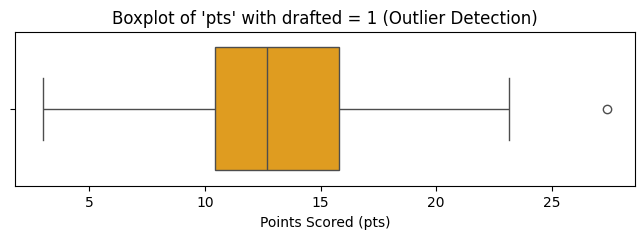

In [798]:
# Visualize outliers in the 'pts' column using a boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=train[train['drafted']==1].pts, color='orange')
plt.title("Boxplot of 'pts' with drafted = 1 (Outlier Detection)")
plt.xlabel('Points Scored (pts)')   
plt.show()

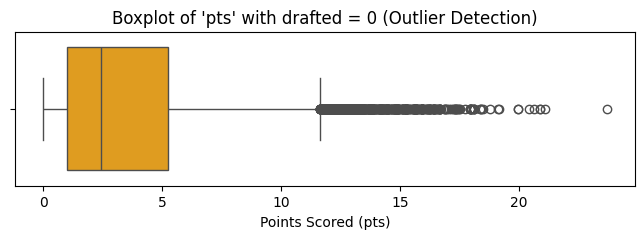

In [799]:
# Visualize outliers in the 'pts' column using a boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=train[train['drafted']==0].pts, color='orange')
plt.title("Boxplot of 'pts' with drafted = 0 (Outlier Detection)")
plt.xlabel('Points Scored (pts)')   
plt.show()

- on more precise outlier detection within each group we found that drafted = 0 has majority of the outliers 
    - this might be due to high bias data as we have high number of data points with drafted = 0

In [800]:
# <Student to fill this section>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...


Distribution & Summary:
- The values range from 0 to 27.375, with a mean of 3.662.
- The distribution is right-skewed: most players score low points, and only a few achieve high scores.
- 75% of players have a `pts` value below 5.37, indicating that high scorers are rare.
- There is one missing value in the column, which should be addressed during data cleaning.
- The feature has 3453 unique values, showing a wide spread of scoring ability.
- A significant number of players have a score of 0, and none of these players were drafted.

Relationship with Target:
- Nearly all drafted players (115 out of 118) have a `pts` value greater than 5, suggesting a strong association between high scoring and being drafted.
- The scatter plot and value counts confirm that higher `pts` values are highly predictive of being drafted.

Limitations & Issues:
- Class Imbalance: The vast majority of players are not drafted, and most have low `pts` values. This imbalance can bias models and make it difficult to learn patterns for the minority (drafted) class.
- Outliers: The presence of very high `pts` values (outliers) may affect model performance and should be examined.
- **Missing Value: The single missing value can be imputed or handled out during preprocessing.
- Skewness: The right-skewed distribution may require transformation (e.g., log transformation) to improve model performance.
- Zero Inflation: Many players have a score of 0, which may reflect players who did not play or had limited opportunities, potentially introducing bias.

"""

In [801]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `Min_per` 

In [802]:
# <Student to fill this section>

In [803]:
feature_of_interest2 = train['Min_per']
print(feature_of_interest2.head(5))
feature_of_interest2.describe()

0    52.6
1     0.8
2     0.6
3    59.2
4    13.7
Name: Min_per, dtype: float64


count    14774.000000
mean        25.870123
std         23.639878
min          0.000000
25%          4.200000
50%         19.600000
75%         42.900000
max         94.300000
Name: Min_per, dtype: float64

- It has minimum value of 0 % played indicating the player never had chance or the his data was not recorded
- it has a maximum value of 94.3 %, this seems to be extremely high suggesting 1 guy carried the team.
- It has mean of 25.87 % indicating average time, his could be wrong as there are players with 0 % which can reduce the mean.
- Almost 75% people lies below 42.9 % time

In [804]:
feature_of_interest2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14774 entries, 0 to 14773
Series name: Min_per
Non-Null Count  Dtype  
--------------  -----  
14774 non-null  float64
dtypes: float64(1)
memory usage: 115.6 KB


- It has no Null values 
- we can also see that the data type is float and is correct for this column

In [805]:
feature_of_interest2.value_counts().sort_index(ascending=False)

Min_per
94.3      1
94.1      1
93.5      1
92.7      1
92.6      2
       ... 
0.4     178
0.3     217
0.2     286
0.1     258
0.0       5
Name: count, Length: 887, dtype: int64

- There are 887 unique values
- There are significant number of high values indicating immense skill difference in team

In [806]:

fig = px.histogram(train, x='Min_per', nbins=30, color_discrete_sequence=['lightgreen'])
fig.update_layout(
    title="Interactive Histogram of 'Min_per'",
    xaxis_title='Min_per (%)',
    yaxis_title='Frequency',
    bargap=0.05
)
fig.show()

- Many players have a Min_per value greater than 50%, indicating they participated in more than half of their team's total playing time, which suggests a high level of skill and importance to the team.

In [807]:
feature_of_interest2[feature_of_interest2>50]

0        52.6
3        59.2
11       59.2
14       58.4
18       53.0
         ... 
14752    55.6
14753    80.5
14762    61.9
14764    85.2
14771    84.7
Name: Min_per, Length: 2754, dtype: float64

- There are 2754 players with `Min_per` greater than 50, which is a significant portion of the dataset 

In [808]:
# Show players with Min_per > 50 and drafted == 1
train[(feature_of_interest2 > 50) & (train['drafted'] == 1)]

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
210,UCLA,P10,35,67.6,107.2,20.5,50.4,53.15,6.0,11.8,...,3.43319,1.2571,2.5143,3.7714,3.6857,1.5714,0.5143,8.4571,99eee70f-3af1-4563-84ab-389ef31cbbaf,1.0
212,USC,P10,35,82.8,108.2,22.3,53.1,55.51,9.3,11.6,...,1.44019,2.4000,3.3429,5.7429,1.4571,0.8857,0.3714,13.8571,4b2a8933-fb89-4e8e-a0a3-87a46ceb67d5,1.0
878,Memphis,CUSA,37,72.2,101.8,33.0,48.9,52.92,5.0,15.3,...,5.26382,1.2703,4.0811,5.3514,3.8649,2.0811,0.7838,17.0811,c78f1624-6bc7-4a8f-ba28-8cc4009f8e8b,1.0
1240,Ohio St.,B10,33,50.3,106.2,23.2,63.8,62.88,11.6,17.1,...,1.43677,1.6667,3.0000,4.6667,0.2727,0.4848,1.1212,8.8485,af62d5c3-073b-4ce7-bfac-c88688dbd62f,1.0
1367,Kansas,B12,36,68.3,113.7,21.7,55.5,59.10,5.2,11.5,...,2.47754,1.1944,3.1667,4.3611,1.4722,1.5000,0.5000,13.4167,9578f51f-3992-4aa6-827b-54d1a902dd59,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14172,Kentucky,SEC,37,84.0,114.1,22.8,51.6,57.87,3.2,10.0,...,3.04908,0.8919,3.2432,4.1351,5.1081,1.6486,0.4865,14.3784,342e2570-f770-411a-872e-ef60c9d71b95,1.0
14286,Kentucky,SEC,24,57.5,109.0,18.2,59.0,58.26,10.4,22.3,...,7.13561,2.7083,6.7500,9.4583,1.5833,2.0833,4.4167,10.4583,77658b9e-b471-4993-9392-147708b08a2f,1.0
14368,Duke,ACC,39,84.2,121.8,19.9,48.9,57.49,1.8,9.9,...,2.78366,0.4872,3.0256,3.5128,5.5641,1.5128,0.0769,11.8205,53e4b535-7362-4fe4-b793-33f56051c487,1.0
14611,Villanova,BE,40,69.7,121.0,17.9,57.3,58.77,9.9,23.0,...,2.22098,2.2500,5.7750,8.0250,0.7500,0.6500,1.4750,10.8500,efae6434-b18e-4742-8f83-7db3cca5c8d7,1.0


- we can see 100 out of the 118 drafted have min_pr >50 suggesting that this column is important for training

Text(0.5, 1.0, 'Scatter Plot: Min_per vs Drafted')

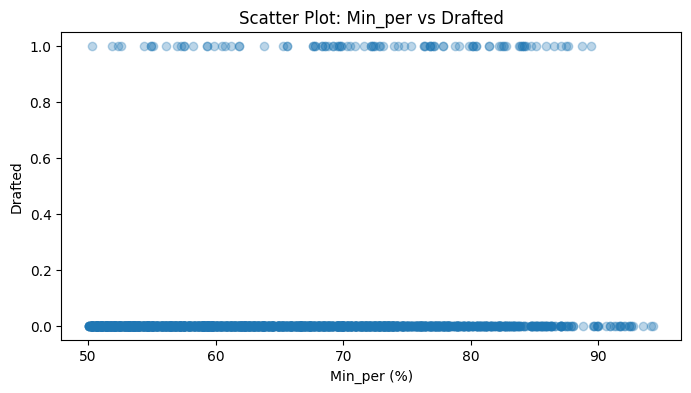

In [809]:

plt.figure(figsize=(8, 4))
plt.scatter(feature_of_interest2[feature_of_interest2>50], train[feature_of_interest2>50].drafted, alpha=0.3)
plt.xlabel('Min_per (%)')
plt.ylabel('Drafted')
plt.title('Scatter Plot: Min_per vs Drafted')

In [810]:
# <Student to fill this section>
feature_2_insights = """
Distribution & Summary:
- The `Min_per` feature represents the percentage of total team minutes that a player participated in during the season.
- The values range from a minimum of 0% (players who never played or whose data was not recorded) to a maximum of 94.3% 
(indicating a player who was almost always on the court).
- The mean is 25.87%, but this is likely skewed lower by the presence of many players with 0% playing time.
- The 75th percentile is 42.9%, meaning that only a quarter of players played more than about 43% of their team's minutes.
- There are 887 unique values, showing a wide spread in playing time across players.
- No missing values are present in this feature.

Key Insights:
- A significant number of players have high `Min_per` values, indicating that some players are much more central to their teams 
than others.
- Many players (2,754) have `Min_per` greater than 50%, meaning they played more than half of their team's total minutes.
 This suggests these players are likely key contributors.
- Among drafted players, 100 out of 118 have `Min_per` above 50%, highlighting a strong relationship between playing time and 
likelihood of being drafted.

Limitations & Issues:
- Zero Inflation: The presence of many players with 0% playing time may reflect bench players, injured players, or data entry
 issues. This can skew summary statistics and may not be informative for modeling.
- Right Skew: The distribution is right-skewed, with most players having lower playing time and a minority playing very
 high percentages. This may require transformation or careful handling in modeling.
- Potential Bias: Players with high `Min_per` are more likely to be noticed and thus drafted, but this may also reflect 
team strategy rather than individual skill alone.
"""

In [811]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `OBPM`


In [812]:
# <Student to fill this section>

In [813]:
feature_of_interest3 = train['obpm']
print(feature_of_interest3.head(5))
feature_of_interest3.describe()

0     2.627860
1   -13.028600
2    -9.079290
3    -0.339201
4    -9.045760
Name: obpm, dtype: float64


count    14769.000000
mean        -3.121418
std          5.769338
min        -68.542000
25%         -5.253410
50%         -2.565850
75%         -0.160565
max        161.995000
Name: obpm, dtype: float64

- we can see that the mean is -3.12 which is slightly below zero suggesting that On average player contributes slightly below league average offensively
- The lowest OBPM is -68.542, indicating very poor offensive contribution for the minima data point
- The 50% = -2.56 indicate that half of the players are lie in the less offensive playstyle
- The negetive 75 percentage suggest that most of players are not offensive than the league average
- 	The highest obpm is 161.995, which is a very high jump from most of the contributors, indicating an elite offensive contributor 

In [814]:
feature_of_interest3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14774 entries, 0 to 14773
Series name: obpm
Non-Null Count  Dtype  
--------------  -----  
14769 non-null  float64
dtypes: float64(1)
memory usage: 115.6 KB


- We can see there are 5 null values as there are only 1479 non null entries out of 14774 entries in total
-  We can also see that the data type is correct and is of float .

In [815]:
# Interactive histogram for feature_of_interest3 (obpm)
fig = px.histogram(
    train,
    x='obpm',
    nbins=50,
    title="Interactive Histogram of 'obpm' (Offensive Box Plus/Minus)",
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(
    xaxis_title='OBPM (Offensive Box Plus/Minus)',
    yaxis_title='Frequency',
    bargap=0.05
)
fig.show()

- The column form a bell curve with few outliers on both of the extreme sides.
- we can see most of the players are near 0 ie. the league average offensively
- but majority of players are below zero pulling down mean value


In [816]:
len(feature_of_interest3[feature_of_interest3> 0])

3486

- there are around 3500 players that play more aggressively than the league average

In [817]:
train[feature_of_interest3 > 0]['drafted'].value_counts()

drafted
0.0    3378
1.0     108
Name: count, dtype: int64

- out of 118 drafted players 108 are have OBPM score greater than league averge 
- this means this column is important for determining the player drafting

In [818]:
# Assuming 'feature_of_interest3' and 'train' are DataFrames
fig = px.scatter(x=train[feature_of_interest3 > 0]['obpm'], y=train[feature_of_interest3 > 0]['drafted'])
fig.update_layout(title='Relationship between feature_of_interest3 and Drafted',
                  xaxis_title='feature_of_interest3 (above 0)',
                  yaxis_title='Drafted')
fig.show()

- we can see that there are lots of values in not drafted with obpm greater than zero as well 
- this could make the model struggle

In [819]:
# <Student to fill this section>
feature_n_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

Feature: OBPM (Offensive Box Plus/Minus)

Distribution & Summary:
- The OBPM feature is approximately bell-shaped (normal-like), but with a mean of -3.12, indicating most players contribute slightly below league average offensively.
- The median (50th percentile) is -2.56, and the 75th percentile is also negative, confirming that the majority of players are below average in offensive impact.
- The minimum value is extremely low (-68.54), and the maximum is extremely high (161.99), showing the presence of significant outliers on both ends.
- Most players cluster near 0, but the distribution is slightly left-skewed and hence the negative mean.
- There are 5 missing values in this column, which should be addressed during data cleaning.

Relationship with Target:
- 3486 players have OBPM > 0 (above league average offensively).
- Of the 118 drafted players, 108 have OBPM > 0, indicating a strong association between high OBPM and being drafted.
- However, many undrafted players also have OBPM > 0, so while a high OBPM increases the chance of being drafted, it is not a guarantee.

Limitations & Issues:
- Outliers: The extreme minimum and maximum values may distort model training and should be handled (e.g., capping, transformation).
- Missing Values: The presence of missing values (5 out of ~14,774) needs to be addressed.
- Overlap: There is considerable overlap between drafted and undrafted players for OBPM > 0, which may reduce the feature's discriminative power.
- Skewness: The negative skew (mean < median) suggests most players are below average, which may bias models if not handled.
- Interpretability: While OBPM is a strong indicator, it should be used alongside other features for robust predictions.

Conclusion:
- OBPM is a valuable feature for predicting draft status, especially for identifying top offensive contributors.
- Its predictive power is limited by overlap with undrafted players and the presence of outliers and missing values.
- Proper preprocessing (handling missing values, outliers, and possible transformation) is needed before using this feature in modeling.

"""

In [820]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "Chi-Square Test "



we will use statistical tests chi-square for categorical features  to evaluate the individual relationship between each feature and the target variable. This helps to quickly filter out features with little or no predictive power.


In [821]:
final_features = []

In [822]:
categorical_features.head()

,team,conf,yr,ht,type,player_id
0,Pacific,BW,Fr,11-May,all,681edf6e-41cb-4fd1-ba91-da573e063fbc
1,Mississippi,SEC,Fr,2-Jun,all,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4
2,Stephen F. Austin,Slnd,Fr,1-Jun,all,ca0d8700-807d-4fce-a7a9-63922d1981e6
3,Virginia,ACC,Fr,1-Jun,all,01285c6b-bc71-4fa8-941a-28cf3976a117
4,Elon,SC,Fr,2-Jun,all,a962c41c-55ff-461e-8585-db32e4fa0580


In [823]:
temp=categorical_features.copy() # create a copy of categorical features for further processing

In [824]:
for col in temp.columns:
    le= LabelEncoder()
    temp[col] = le.fit_transform(temp[col])
temp.head()

,team,conf,yr,ht,type,player_id
0,225,10,0,8,0,4925
1,175,29,0,10,0,2548
2,281,31,0,3,0,9607
3,332,1,0,3,0,61
4,81,28,0,10,0,8079


In [825]:
X=temp.drop(columns=['ht',       # dropped ht coz it is supposed to be numerical column
                     'yr',      # dropped yr coz it has only one unique value as discussed in data exploration
                     'type',    # dropped type coz it has only one unique value as discussed in data exploration
                     'player_id' # dropped player_id coz it is id column
                     ],axis=1) 

y=train['drafted']

- dropped ht coz it is supposed to be numerical column
- dropped yr coz it has only one unique value as discussed in data exploration
- dropped type coz it has only one unique value as discussed in data exploration
- dropped player_id coz it is id column

In [826]:
chi_score= chi2(X,y)

In [827]:
chi_score

(array([218.62882546,   7.97152796]), array([1.80084312e-49, 4.75188113e-03]))

Text(0.5, 1.0, 'Chi-Squared Test Results for Categorical Features')

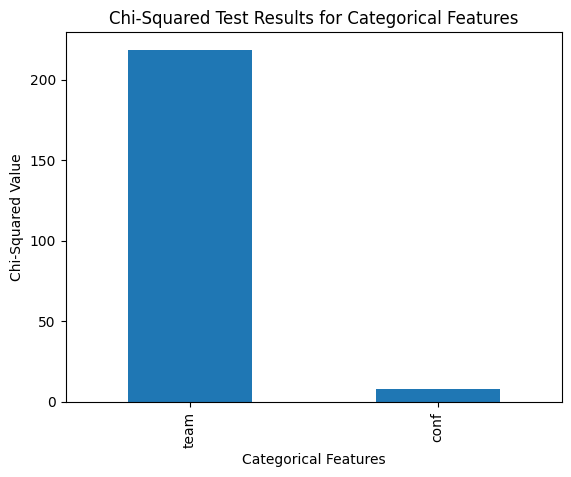

In [828]:
chi_values = pd.Series(chi_score[0], index=X.columns, name='Chi-Squared Value').sort_values(ascending=False)
ax = chi_values.plot.bar()
ax.set_xlabel("Categorical Features")
ax.set_ylabel("Chi-Squared Value")
ax.set_title("Chi-Squared Test Results for Categorical Features")

- High chi sq value is means good association
- The 'team' feature appears to have a strong association with whether a player is drafted.
- The 'conf' column, on the other hand, does not seem to be significantly related and may not be useful for modeling.

In [829]:
final_features.append('team')

In [830]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results

The Chi-Square test is a well-established statistical method for evaluating the association between categorical features 
and a categorical target variable. By applying this test, we can quantitatively assess which categorical features are most relevant for predicting 
the target, allowing us to filter out features with little or no predictive power early in the process.

In this analysis, we excluded columns such as 'ht' (which should be treated as numerical), 'yr' and 'type' 
(both with only one unique value and thus not informative), and 'player_id' (an identifier, not a predictive feature). 

The results showed that the 'team' feature has a strong association with the target variable (drafted), 
while features like 'conf' do not show significant relevance and may be excluded from further modeling. 
This approach ensures that only meaningful categorical predictors are retained for the next steps.
"""

In [831]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "ANOVA"


In [832]:
temp=train.copy() # create a copy of train for further processing of ht column for anova

In [833]:
# <Student to fill this section>
def ht_str_to_cm(ht_str):
    """
    Convert 'ht' column from date-like string (e.g., '1-Jun') to centimeters.
    Assumes format: '<inches>-<MonthAbbr>' where MonthAbbr maps to feet.
    Example: '1-Jun' -> 6'1'' -> 6 feet 1 inch.
    """
    # Map month abbreviations to feet
    month_to_feet = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    try:
        # Split the string
        parts = ht_str.split('-')
        if len(parts) != 2:
            return np.nan
        inches = int(parts[0])
        month = parts[1].strip().title()
        feet = month_to_feet.get(month)
        if feet is None:
            return np.nan
        total_inches = feet * 12 + inches
        cm = round(total_inches * 2.54, 1)
        return cm
    except Exception:
        return np.nan

# Apply conversion to the 'ht' column
numerical_features['ht'] = temp['ht'].apply(ht_str_to_cm)

# Preview the conversion
print(numerical_features[ 'ht'].head())


0    180.3
1    188.0
2    185.4
3    185.4
4    188.0
Name: ht, dtype: float64


- Converted the ht column into the correct numerical column (cm) 

In [834]:
numerical_features.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,ht
0,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,17.6,24.7,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,0.0,180.3
1,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,0.0,19.6,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0,188.0
2,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,0.0,40.3,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,0.0,185.4
3,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,25.2,27.4,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,0.0,185.4
4,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,10.2,47.1,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,0.0,188.0


In [835]:


# Select only numerical columns (excluding the target)
numerical_cols = numerical_features.columns.drop('drafted')

anova_results = []
selected_features = []

alpha = 0.05  # significance level

for col in numerical_cols:
    group0 = numerical_features[numerical_features['drafted'] == 0][col].dropna()
    group1 = numerical_features[numerical_features['drafted'] == 1][col].dropna()
    f_stat, p_val = f_oneway(group0, group1)
    anova_results.append({
        'feature': col,
        'F-test ratio': f_stat,
        'p-value': p_val
    })
    if p_val < alpha:
        selected_features.append(col)

# Create DataFrame of results
anova_df = pd.DataFrame(anova_results).sort_values('F-test ratio', ascending=False)

# Print selected features
print("Best features selected by ANOVA (p-value < 0.05):")
print(selected_features )
print()
# not selected features
print("Features not selected by ANOVA (p-value >= 0.05):")
print(anova_df[anova_df['p-value'] >= alpha][['feature', 'F-test ratio', 'p-value']])


Best features selected by ANOVA (p-value < 0.05):
['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'porpag', 'adjoe', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'ht']

Features not selected by ANOVA (p-value >= 0.05):
    feature  F-test ratio   p-value
24      pfr      2.826222  0.092757
6   ORB_per      2.600582  0.106846
21      ftr      2.082546  0.149013
20  stl_per      1.972347  0.160220


- Anova tells us whether there are statistically significant difference betweent the means of two or more groups.
    - F test->  A higher F-value indicates a greater difference between the group means relative to the variation within the groups. This suggests
                 the feature is more likely to be useful for distinguishing between classes (e.g., drafted vs. not drafted).
    - p-value-> If the p-value is less than the chosen significance level (commonly α = 0.05), we reject the null hypothesis that the group means
                 are equal. This means the feature is statistically significant and likely relevant for predicting the target.

- Results
    - Features with p-value < 0.05 are considered to have a significant difference between groups and are good candidates for modeling.
    - Features with p-value ≥ 0.05 do not show a significant difference and may be less useful for prediction.
   - hence we Select all columns which p < 0.05 and discard others [pfr,orb_pr,ftr,stl_per] with p≥ 0.05.


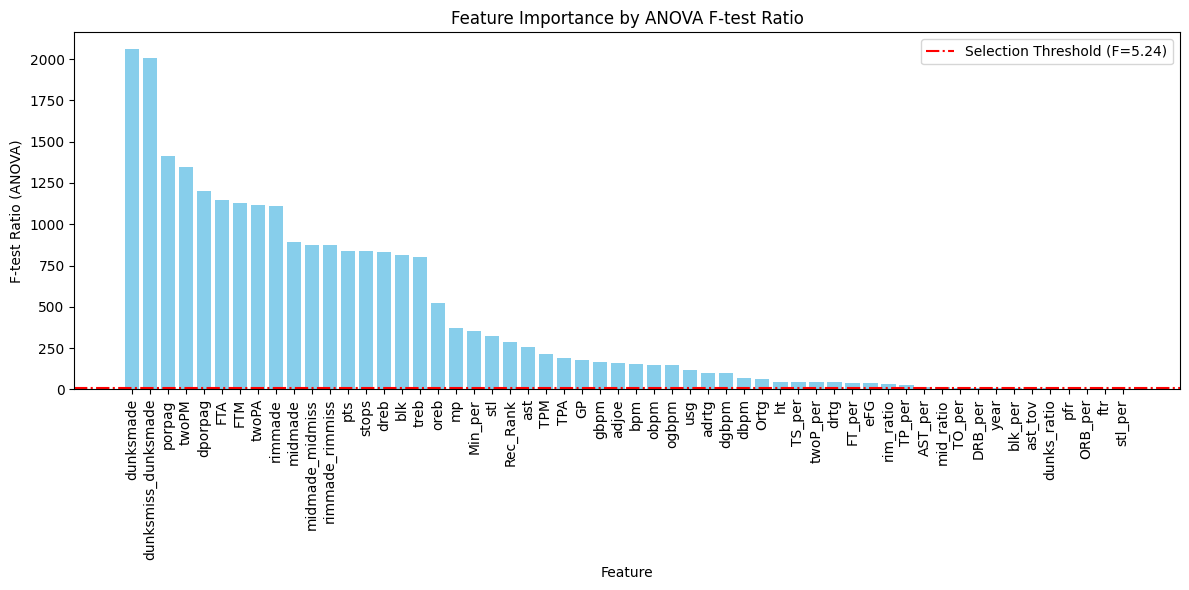

In [836]:


# anova_df should already be created from previous ANOVA code
# It contains columns: 'feature', 'F-test ratio', 'p-value' 

plt.figure(figsize=(12, 6))
bars = plt.bar(anova_df['feature'], anova_df['F-test ratio'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('F-test Ratio (ANOVA)')
plt.title('Feature Importance by ANOVA F-test Ratio')
plt.xticks(rotation=90)
plt.tight_layout()

# Mark the threshold line for significance (alpha = 0.05)
# Find the minimum F-test ratio among selected features (p-value < alpha)
alpha = 0.05
if (anova_df['p-value'] < alpha).any():
    threshold = anova_df[anova_df['p-value'] < alpha]['F-test ratio'].min()
    plt.axhline(y=threshold, color='red', linestyle='-.', label=f'Selection Threshold (F={threshold:.2f})')
    plt.legend()

plt.show()

In [837]:
# selected features
print("Features selected by ANOVA (p-value < 0.05):")
print(anova_df[anova_df['p-value'] < alpha][['feature', 'F-test ratio', 'p-value']])

Features selected by ANOVA (p-value < 0.05):
                feature  F-test ratio        p-value
34            dunksmade   2059.546046   0.000000e+00
35  dunksmiss_dunksmade   2006.874562   0.000000e+00
22               porpag   1415.549610  6.501310e-296
13                twoPM   1344.984461  6.867271e-282
39              dporpag   1203.278414  1.549390e-253
11                  FTA   1148.389060  1.724145e-242
10                  FTM   1127.347186  3.038746e-238
14                twoPA   1116.569544  4.568354e-236
28              rimmade   1109.873552  2.230211e-233
30              midmade    894.376767  5.807679e-190
31      midmade_midmiss    876.398761  2.615230e-186
29      rimmade_rimmiss    873.105355  1.222735e-185
54                  pts    836.356127  6.239361e-179
40                stops    835.999425  7.410209e-179
49                 dreb    834.777901  1.317912e-178
53                  blk    811.619671  7.743609e-174
50                 treb    799.223870  2.783789e-171
4

- we can see dunksmade, dunksmiss_dunksmade, porpag column have the highest level of assocication with the drafted column as per ANOVA.
- 

In [838]:

for i in selected_features:
    final_features.append(i)


final_features=set(final_features)  # Convert to set to avoid duplicates
final_features = list(final_features)  # Convert back to list for consistency
len(final_features)

53

- need to make sure the list consist of no duplicate values

In [839]:
# <Student to fill this section>
feature_selection_2_insights = """

provide an explanation on why you use this approach for feature selection and describe its results

ANOVA/f-test for numerical features was used to evaluate the individual relationship between each feature and the target variable.

We used the ANOVA (Analysis of Variance) test for feature selection because of its statistical method to determine whether there
are significant differences in the means of a numerical feature across two or more groups—in this case, drafted vs. not drafted players.
ANOVA provides two key outputs: the F-test ratio (which measures the variance between groups relative to the variance within groups) and 
the p-value (which indicates the probability that the observed differences are due to chance).

By selecting features with p-value < 0.05, we ensure that only those features that show a statistically significant difference between drafted 
and non-drafted players are retained for modeling. This helps reduce noise and improve model performance by focusing on the most relevant predictors.

The results showed that features like 'dunksmade', 'dunksmiss_dunksmade', and 'porpag' have the highest association with the target variable, 
indicating they are strong predictors of draft status. Features with p-value ≥ 0.05, such as 'pfr', 'orb_pr', 'ftr', and 'stl_per', were excluded 
as they do not provide significant discriminatory power.

This approach ensures that the final feature set is both statistically justified and relevant for the prediction task, reducing the risk of 
overfitting and improving interpretability.
"""

In [840]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [841]:
# <Student to fill this section>

features_list = final_features
features_list

['AST_per',
 'rimmade',
 'ast',
 'FTA',
 'oreb',
 'twoPM',
 'FTM',
 'dbpm',
 'dunksmade',
 'TP_per',
 'bpm',
 'dreb',
 'treb',
 'ast_tov',
 'ogbpm',
 'ht',
 'obpm',
 'dunks_ratio',
 'team',
 'eFG',
 'TO_per',
 'Min_per',
 'stops',
 'stl',
 'porpag',
 'dunksmiss_dunksmade',
 'DRB_per',
 'usg',
 'FT_per',
 'blk',
 'dporpag',
 'midmade',
 'twoPA',
 'GP',
 'year',
 'Ortg',
 'blk_per',
 'rim_ratio',
 'adjoe',
 'TS_per',
 'midmade_midmiss',
 'dgbpm',
 'TPM',
 'gbpm',
 'TPA',
 'rimmade_rimmiss',
 'Rec_Rank',
 'drtg',
 'pts',
 'adrtg',
 'mp',
 'twoP_per',
 'mid_ratio']

In [842]:
# <Student to fill this section>
feature_selection_explanations = """
The selected features were chosen based on their strong statistical association with the target variable (drafted) 
using both Chi-Square tests for categorical variables and ANOVA for numerical variables.

These features demonstrated significant differences between drafted and non-drafted players, 
making them the most relevant predictors for the model. 

"""

In [843]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Cleaning "Removing the column with only one unique value"

In [844]:
# <Student to fill this section>

In [845]:
# Check how many columns has more than 1 unique value
train.nunique().sort_values(ascending=True)

yr             1
type           1
drafted        2
year          10
ht            32
           ...  
obpm       12256
porpag     12257
gbpm       12260
dgbpm      12262
ogbpm      12265
Length: 62, dtype: int64

In [846]:
train.drop(columns=['yr','type'], inplace=True) # Drop columns with one unique values 

- These columns do not provide any useful information to the model during training and should therefore be removed.

In [847]:
# <Student to fill this section>
data_cleaning_1_explanations = """
It is important to remove columns with only one unique value because they do not provide any meaningful information or variability for 
the model to learn from. Keeping such columns can add unnecessary noise, increase computational cost, and potentially lead to overfitting 
without improving model performance. 
"""

In [848]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Cleaning "Null Values"

In [849]:
# <Student to fill this section>

In [850]:
train.isnull().sum().sort_values(ascending=False)

Rec_Rank               9885
dunks_ratio            9388
rim_ratio              3203
mid_ratio              3191
rimmade                2075
rimmade_rimmiss        2075
midmade_midmiss        2075
midmade                2075
dunksmiss_dunksmade    2075
dunksmade              2075
ast_tov                1535
ht                        8
bpm                       5
stops                     5
adrtg                     5
dporpag                   5
drtg                      5
dbpm                      5
obpm                      5
ogbpm                     5
gbpm                      5
dgbpm                     5
dreb                      1
mp                        1
oreb                      1
ast                       1
treb                      1
blk                       1
pts                       1
stl                       1
porpag                    0
adjoe                     0
pfr                       0
stl_per                   0
TP_per                    0
TPA                 

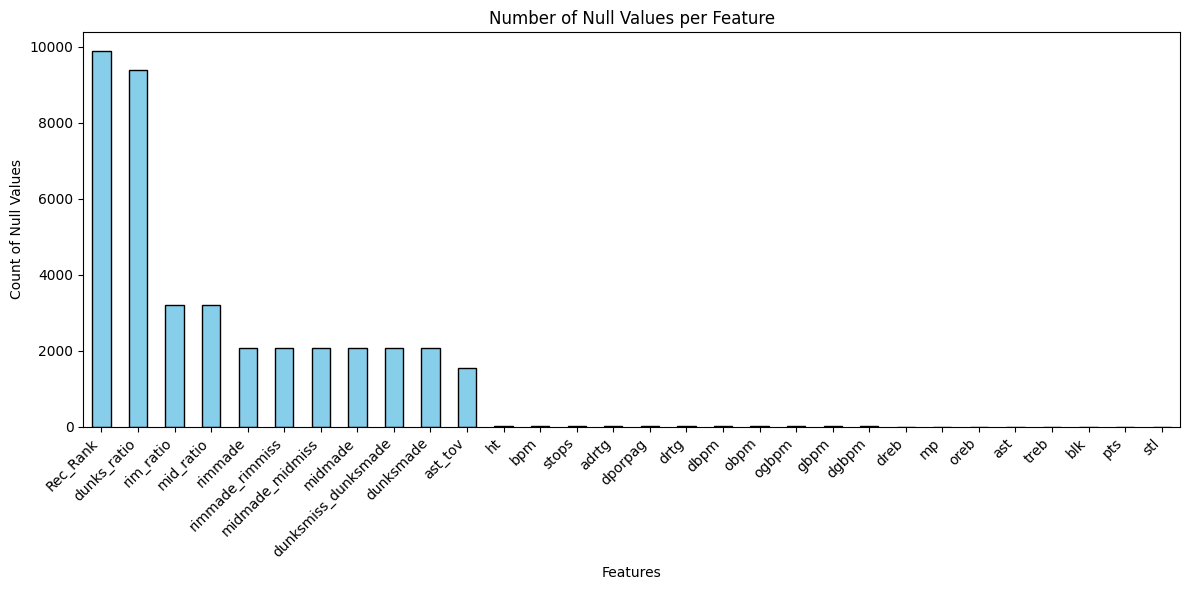

In [851]:
null_counts = train.isnull().sum().sort_values(ascending=False)
# Filter only features with missing values
null_counts = null_counts[null_counts > 0]
# Plot
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Null Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- On visualizing we came to know that 19 of the columns have very few null values. 

In [852]:
train.ht.isnull().sum()

np.int64(8)

- the highest number of null values amoung the small number of null value group of columns is 8 fr ht column 
- we will use this information to determine how many null values exist cumulatively in the small number of null values group column


In [853]:
# Find columns with less than 10 null values
few_null_cols = train.columns[(train.isnull().sum() < 10)&(train.isnull().sum() > 0)]
len(few_null_cols)
# Get all rows where any of these columns have a null value
rows_with_nulls = train[train[few_null_cols].isnull().any(axis=1)]
# # Display or process these rows as needed
len(rows_with_nulls)

13

- we just need to remove 13 entires to get rid of the group of small number of null value columns

In [854]:
# Remove rows where any column with less than 10 nulls has a null value
few_null_cols = train.columns[(train.isnull().sum() < 10) & (train.isnull().sum() > 0)]
train = train.dropna(subset=few_null_cols)

In [855]:
# Find columns with less than 10 null values
few_null_cols = train.columns[(train.isnull().sum() < 10)&(train.isnull().sum() > 0)]
len(few_null_cols)
# Get all rows where any of these columns have a null value
rows_with_nulls = train[train[few_null_cols].isnull().any(axis=1)]
# # Display or process these rows as needed
len(rows_with_nulls)

0

- now lets deal with the large number of null values column group

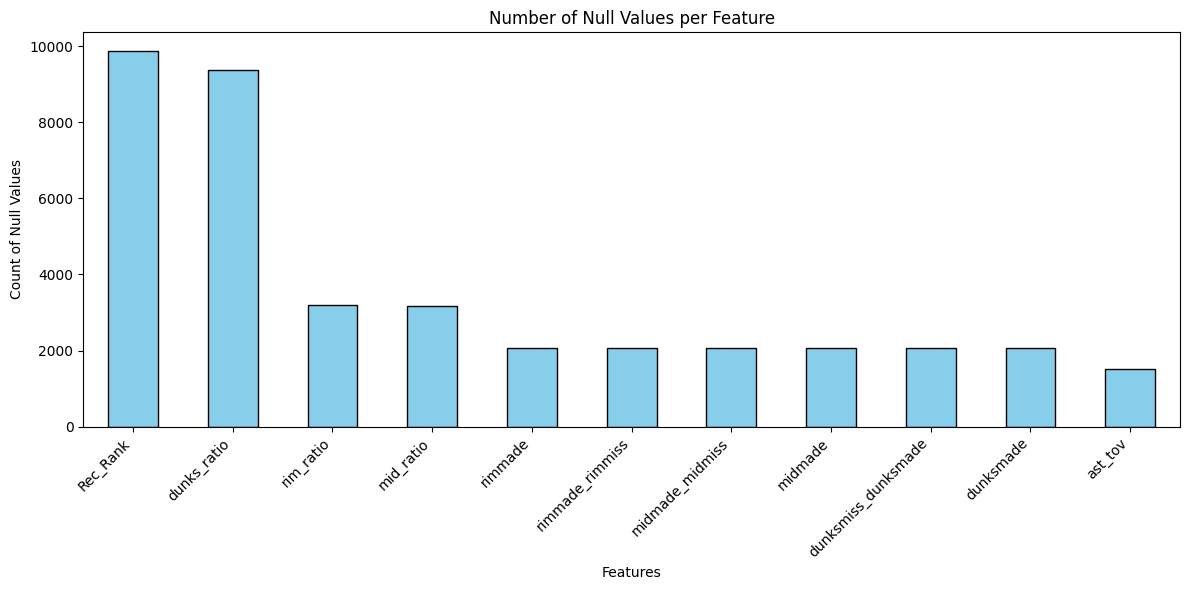

In [856]:
null_counts = train.isnull().sum().sort_values(ascending=False)
# Filter only features with missing values
null_counts = null_counts[null_counts > 0]
# Plot
plt.figure(figsize=(12, 6))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Null Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- we start from the column with most null values 

In [857]:
"Rec_Rank" in final_features

True

- it is part of final_features

In [858]:
train.Rec_Rank.isnull().sum()

np.int64(9872)

In [859]:
train.Rec_Rank.value_counts()

Rec_Rank
78.4    16
88.6    16
75.6    15
73.6    15
72.8    15
        ..
11.4     4
8.6      4
1.2      4
2.8      3
2.4      3
Name: count, Length: 500, dtype: int64

- Rec_Rank,Recruiting rank i.e. what the player was ranked as a recruit coming out of high school
- The `Rec_Rank` column contains 9,872 null values and only 500 unique values. 
Since this ranking was assigned during high school graduation and may depend on various unknown factors, Even though it is in final_features list it is not considered usefull due to so many null values. Therefore, we will drop this column from the dataset.

In [860]:
# Drop Rec_Rank column due to excessive nulls and limited usefulness
train.drop(columns=['Rec_Rank'],axis=1, inplace=True)

In [861]:
"dunks_ratio" in final_features

True

- it is present in final_features column

In [862]:
train.dunks_ratio.isnull().sum()

np.int64(9375)

In [877]:
train.dunks_ratio.value_counts().sort_index(ascending=False)

dunks_ratio
inf          3056
67.000000       1
60.000000       1
50.000000       2
48.000000       1
             ... 
0.666667       13
0.500000       38
0.333333        4
0.250000        2
0.000000      281
Name: count, Length: 151, dtype: int64

- lets see what might be causing inf value
- if we see at the formula denominator has train['dunksmiss_dunksmade'] - train['dunksmade'] meaning these values could be same

In [871]:
# List all entries where dunksmade equals dunksmiss_dunksmade
equal_dunks = train[train['dunksmade'] == train['dunksmiss_dunksmade']].dunksmade.value_counts()
print(equal_dunks)

dunksmade
0.0     7306
1.0     1226
2.0      581
3.0      369
4.0      225
5.0      141
6.0       97
7.0       88
8.0       76
9.0       47
10.0      33
11.0      31
12.0      20
15.0      19
13.0      17
14.0      15
16.0      13
18.0       8
20.0       6
19.0       6
24.0       5
17.0       4
25.0       4
21.0       4
22.0       3
26.0       2
30.0       2
31.0       2
23.0       2
56.0       2
27.0       2
29.0       1
52.0       1
34.0       1
28.0       1
35.0       1
48.0       1
Name: count, dtype: int64


- so i think it would be fair if we just assign 1 as denominator to these entries assuming each player recorded missed one dunk.

In [878]:
# Calculate 'dunks_ratio' as the ratio between dunks made and dunks missed, handling zero division
denominator = train['dunksmiss_dunksmade'] - train['dunksmade']
train['dunks_ratio'] = np.where(denominator != 0, train['dunksmade'] / denominator, train['dunksmade'])

In [879]:
train.dunks_ratio.isnull().sum()

np.int64(2069)

In [880]:
train.dunksmade.isnull().sum()

np.int64(2069)

In [881]:
train.dunksmiss_dunksmade.isnull().sum()

np.int64(2069)

- Lets see if we have zero values in both dunksmiss_dunksmade and dunksmade column 


In [886]:
train[(train.dunksmade==0)&(train.dunksmiss_dunksmade==0)].drafted.value_counts()

drafted
0.0    7301
1.0       5
Name: count, dtype: int64

- this implies that their score were never recorded same as missing values meaning we can treat missing values as zero as well


In [890]:
train[train['dunks_ratio'].isnull()].drafted.value_counts()

drafted
0.0    2064
1.0       5
Name: count, dtype: int64

In [891]:
train[train['dunksmiss_dunksmade'].isnull()].drafted.value_counts()

drafted
0.0    2064
1.0       5
Name: count, dtype: int64

In [892]:
train[train['dunksmade'].isnull()].drafted.value_counts()

drafted
0.0    2064
1.0       5
Name: count, dtype: int64

- we can see all the three columns contribution to drafted is around 4.2 percent only (5/118*100)
- so we can fill all of the null values as zero in all three columns

In [897]:
train['dunksmade'].fillna(0, inplace=True)
train['dunksmiss_dunksmade'].fillna(0, inplace=True)
train['dunks_ratio'].fillna(0, inplace=True)
train.dunks_ratio.isnull().sum()

np.int64(0)

In [896]:
train.dunksmade.isnull().sum() == train.dunksmiss_dunksmade.isnull().sum() == train.dunks_ratio.isnull().sum()


np.True_

- there were 9375 null values and we used dunksmade and dunksmiss_dunksmade coulumns to reduce the null value to 2069
- using proper reasoning and assumptions, we filled all the null values


In [ ]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Cleaning <put_name_here>

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_cleaning_3_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"




In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
feature_engineering_n_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_transformation_2_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [ ]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'X_train' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [ ]:
# <Student to fill this section>

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [ ]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)